<a href="https://colab.research.google.com/github/sankalp142002/Stock-predection-using-LSTM/blob/main/Stock_predection_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing all required libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
data_frame=pd.read_csv('c.csv')

In [ ]:
data_frame.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap,TVL
0,12-08-2023,13-08-2023,55.3970,56.8561,54.9612,55.2520,122166521.4,403313634.8,1.334464e+09
1,11-08-2023,12-08-2023,55.3987,55.9676,54.9087,55.4947,143162209.2,403156107.3,1.350192e+09
2,10-08-2023,11-08-2023,55.8277,56.9548,54.9311,55.3338,183212991.1,405914629.6,1.319699e+09
3,09-08-2023,10-08-2023,56.0921,56.6827,54.9759,55.8226,220651056.0,406076717.5,1.302909e+09
4,08-08-2023,09-08-2023,54.1903,56.2510,53.5826,55.8902,279745194.5,398730181.3,1.315023e+09


In [ ]:
df=data_frame.reset_index()['High']

In [ ]:

df.head()

0    56.8561
1    55.9676
2    56.9548
3    56.6827
4    56.2510
Name: High, dtype: float64

In [ ]:

df.describe()

count    1123.000000
mean      191.472158
std       175.745729
min        26.672800
25%        54.060925
50%       125.519800
75%       311.498415
max       909.338091
Name: High, dtype: float64

In [ ]:

df.describe()

count    1123.000000
mean      191.472158
std       175.745729
min        26.672800
25%        54.060925
50%       125.519800
75%       311.498415
max       909.338091
Name: High, dtype: float64

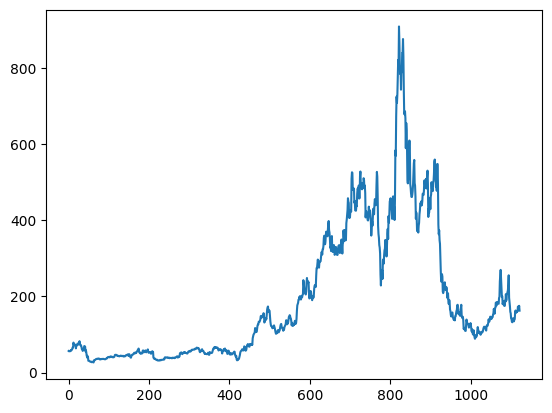

In [ ]:
plt.plot(df)

In [ ]:
#Standardize Data frame
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [ ]:
training_size,test_size

(842, 281)

In [ ]:
#Function to create data set.
def create_dataset(dataset, step):
	X, Y = [], []
	for i in range(len(dataset)-step-1):
		temp = dataset[i:(i+step), 0]
		X.append(temp)
		Y.append(dataset[i + step, 0] )
	return np.array(X), np.array(Y)

In [ ]:
step = 200
X_train, y_train = create_dataset(train_data, step)
X_test, ytest = create_dataset(test_data, step)

In [ ]:
X_train

array([[0.03419563, 0.03318902, 0.03430746, ..., 0.03894883, 0.03223759,
        0.02890269],
       [0.03318902, 0.03430746, 0.03399918, ..., 0.03223759, 0.02890269,
        0.03013849],
       [0.03430746, 0.03399918, 0.0335101 , ..., 0.02890269, 0.03013849,
        0.03068536],
       ...,
       [0.35184355, 0.35876079, 0.38038519, ..., 0.73910618, 0.73872189,
        0.74733561],
       [0.35876079, 0.38038519, 0.38935508, ..., 0.73872189, 0.74733561,
        0.72623429],
       [0.38038519, 0.38935508, 0.38081153, ..., 0.74733561, 0.72623429,
        0.63774707]])

In [ ]:
print(X_train.shape), print(y_train.shape)

(641, 200)
(641,)


(None, None)

In [ ]:
#Reshaping dataset
#X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
#X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
#Creating Model
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(200,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

#from tensorflow.keras.layers import LSTM, Dense, Dropout


#model = Sequential([
#    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
#    Dropout(0.2),
 #   LSTM(64, activation='relu', return_sequences=True),
 #   Dropout(0.2),
#    LSTM(64, activation='relu', return_sequences=True),
#    Dropout(0.2),
 #   LSTM(64, activation='relu'),
  #  Dropout(0.2),
 #   Dense(1)
#])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 200, 100)          40800     
                                                                 
 lstm_4 (LSTM)               (None, 200, 50)           30200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 91251 (356.45 KB)
Trainable params: 91251 (356.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
#Fitting Model
#from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) ,callbacks=[early_stopping]


model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=350,batch_size=64,verbose=1)



#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
#model.fit(X_train, y_train, epochs=160, batch_size=64)

Epoch 1/350


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 [==============================] - 20s 2s/step - loss: 0.0260 - val_loss: 0.0014
Epoch 2/350
11/11 [==============================] - 18s 2s/step - loss: 0.0075 - val_loss: 0.0016
Epoch 3/350
11/11 [==============================] - 19s 2s/step - loss: 0.0042 - val_loss: 0.0015
Epoch 4/350
11/11 [==============================] - 18s 2s/step - loss: 0.0033 - val_loss: 0.0013
Epoch 5/350
11/11 [==============================] - 18s 2s/step - loss: 0.0032 - val_loss: 0.0015
Epoch 6/350
11/11 [==============================] - 18s 2s/step - loss: 0.0030 - val_loss: 0.0013
Epoch 7/350
11/11 [==============================] - 20s 2s/step - loss: 0.0029 - val_loss: 0.0012
Epoch 8/350
11/11 [==============================] - 18s 2s/step - loss: 0.0026 - val_loss: 0.0013
Epoch 9/350
11/11 [==============================] - 18s 2s/step - loss: 0.0024 - val_loss: 0.0012
Epoch 10/350
11/11 [==============================] - 18s 2s/step - loss: 0.0028 - val_loss: 0.0014
Epoch 11/350
11/11 [=

In [56]:
#Predicting Model
tf.config.run_functions_eagerly(True)
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 2s 554ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [58]:
#MSE
#import math
#from sklearn.metrics import mean_squared_error
#math.sqrt(mean_squared_error(y_train,train_predict))

import math
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr



mse = mean_squared_error(y_train, train_predict)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_train, train_predict)
std_deviation = np.std(train_predict)

# SMAPE (Symmetric Mean Absolute Percentage Error)
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))

smape_value = smape(y_train, train_predict)



print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Standard Deviation:", std_deviation)
print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape_value)




Root Mean Squared Error (RMSE): 290.2525829676853
Mean Absolute Error (MAE): 217.40602873245646
Standard Deviation: 192.51712
Symmetric Mean Absolute Percentage Error (SMAPE): 199.17414140450015


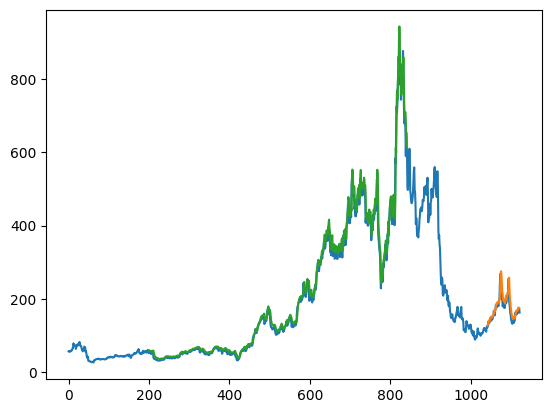

In [59]:
#Plotting data
look_back=200
import numpy
TRPlot = numpy.empty_like(df)
TRPlot[:, :] = np.nan
TRPlot[look_back:len(train_predict)+look_back, :] = train_predict

TEPlot = numpy.empty_like(df)
TEPlot[:, :] = numpy.nan
TEPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df))

plt.plot(TEPlot)

plt.plot(TRPlot)

plt.show()

In [60]:
len(test_data)

281

In [61]:
x_input=test_data[len(test_data)-200:].reshape(1,-1)
x_input.shape


(1, 200)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
#Predicting and plotting Future data for 300 days
from numpy import array

lstm_output=[]
n_steps=200
i=0
while(i<300):

    if(len(temp_input)>200):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lstm_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)

       # print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lstm_output.extend(yhat.tolist())
        i = i + 1


print(lstm_output)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


[[0.1688508242368698], [0.1736314445734024], [0.1798010766506195], [0.18623682856559753], [0.1928156167268753], [0.19952654838562012], [0.20638532936573029], [0.21342015266418457], [0.2206641137599945], [0.22815097868442535], [0.2359136939048767], [0.24398359656333923], [0.25239133834838867], [0.26116734743118286], [0.27034321427345276], [0.2799520790576935], [0.2900298833847046], [0.30061569809913635], [0.31175267696380615], [0.3234887421131134], [0.33587735891342163], [0.3489784896373749], [0.3628600537776947], [0.37759941816329956], [0.3932854235172272], [0.41002073884010315], [0.4279254674911499], [0.44714099168777466], [0.46783506870269775], [0.49020814895629883], [0.5145005583763123], [0.5410007238388062], [0.5700507164001465], [0.6020482778549194], [0.6374322772026062], [0.6766373515129089], [0.7199826240539551], [0.7674512267112732], [0.8183190822601318], [0.8706703782081604], [0.9210547804832458], [0.9647862315177917], [0.9972697496414185], [1.0158787965774536], [1.02106547355

In [ ]:
day_new=np.arange(1,201)
day_pred=np.arange(201,501)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df[len(df)-200:]))
plt.plot(day_pred,scaler.inverse_transform(lstm_output))
plt.title('AAVE')

In [ ]:
df1=df.tolist()
df1.extend(lstm_output)
plt.plot(df1[len(df)-200:])
plt.title('AAVE')

In [ ]:
df1=scaler.inverse_transform(df1).tolist()

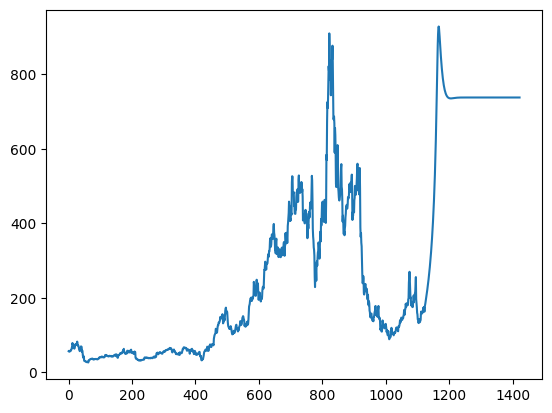

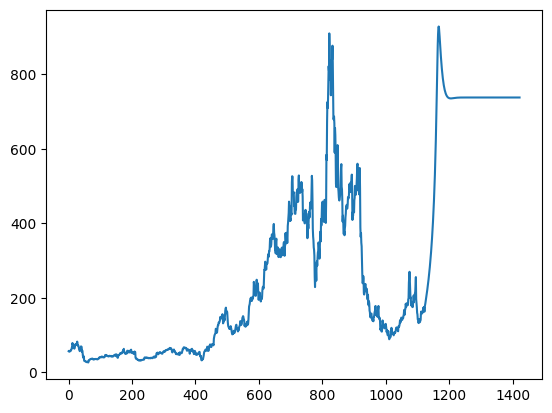

In [70]:
plt.plot(df1)